In [4]:
#import libs
import numpy as np 
import torch 
import matplotlib.pyplot as plt 
import scipy.io

# import files 
from DataSet import DataSet
from FixedGP import FixedGP

In [5]:
def standardize_vector(vec: np.ndarray) -> np.ndarray:
    """standardize a vector

    Args:
        vec (np.ndarray): the array you want to standardize

    Returns:
        np.ndarray: the standardized vector
    """
    mean = np.mean(vec)
    std = np.std(vec)
    return (vec - mean) / std if std != 0 else vec/vec # avoid divide with zero

In [45]:
ds = DataSet('data/','rat','rat6_M1_200218.mat','cebus2')
ds.load_matlab_data()

In [7]:
print(ds.set.keys())

dict_keys(['emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy'])


In [46]:
print(ds.set['sorted_respMean'].shape)
print(ds.set['ch2xy'].shape)

(32, 8)
(32, 2)


In [47]:
map_emg = np.full((ds.set['sorted_respMean'].shape[1],
                    np.max(ds.set['ch2xy'][:,0]),
                    np.max(ds.set['ch2xy'][:,1])
                    ), 
                    np.nan)
for i in range(ds.set['ch2xy'].shape[0]):
    map_emg[:,int(ds.set['ch2xy'][i,0]-1),int(ds.set['ch2xy'][i,1]-1)] = ds.set['sorted_respMean'][i,:]
print(map_emg)

[[[ 11.19063663   3.62319994   3.29798532  10.14769363]
  [  9.00889492   3.61406994   2.96404648   3.90633941]
  [  3.29443145   3.89280915   3.13319302   3.02304244]
  [  3.20736527   3.34933019   3.06419563   3.2095356 ]
  [  3.54442334   3.36368752   2.99720955   2.93296671]
  [  3.66956735   3.17195272   3.27944875   3.03503537]
  [  2.80874062   3.218436     2.93023157   3.1777122 ]
  [  3.04589391   3.37853694   3.20886707   3.09262753]]

 [[  6.17048073   3.682657     3.5766623    3.31374907]
  [  4.77052212   4.13104582   3.41931057   3.45647955]
  [  4.10000515   4.02091074   3.64031076   3.87676024]
  [  4.09241295   4.40664196   3.39553595   3.69917011]
  [  4.93002272   3.88559103   3.79937124   3.55697465]
  [  4.06745577   3.97198272   3.48850608   3.80297995]
  [  3.6853292    3.77285433   3.67014623   3.74921536]
  [  3.82311583   3.95312405   3.701334     4.23177004]]

 [[  3.09933734   2.29362035   2.14728045   2.25619459]
  [  2.71456766   2.42430186   2.11911988   

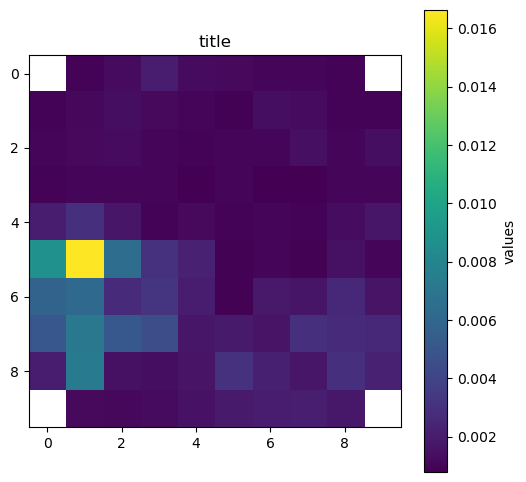

In [7]:
plt.figure(figsize=(6, 6))
plt.imshow(map_emg[0], cmap='viridis', vmin=np.nanmin(map_emg[0]), vmax=np.nanmax(map_emg[0]))
plt.colorbar(label="values")
plt.title("title")
plt.show()

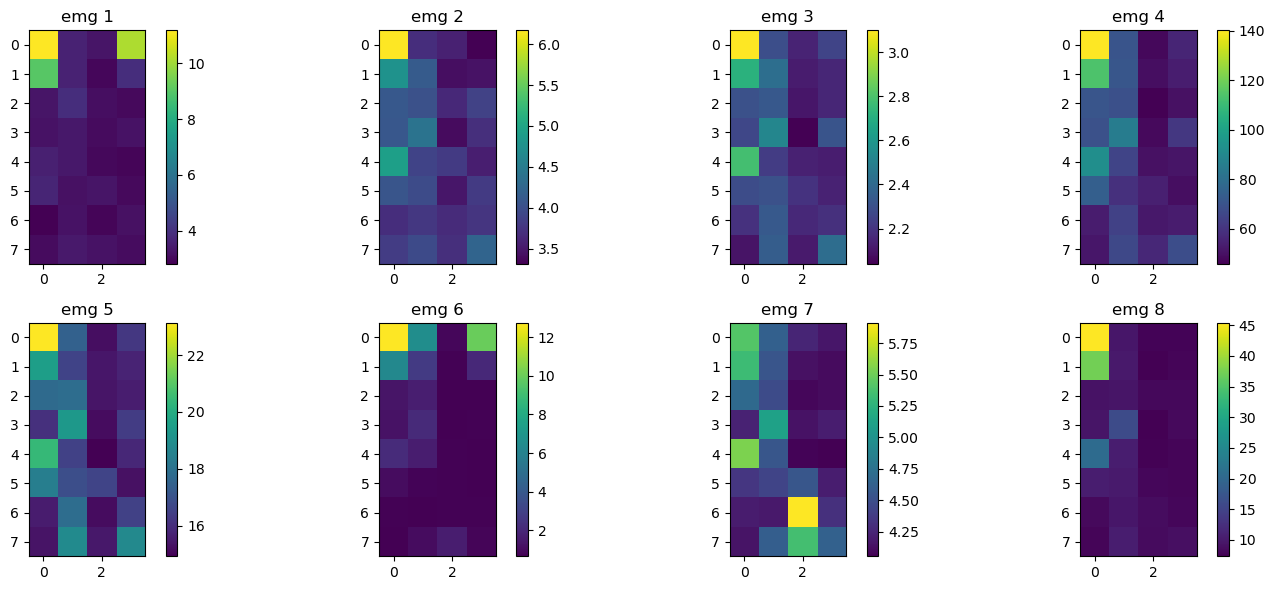

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6)) 

for idx, ax in enumerate(axes.flat):
    cax = ax.imshow(map_emg[idx], cmap='viridis', vmin=np.nanmin(map_emg[idx]), vmax=np.nanmax(map_emg[idx])) 
    ax.set_title(f'emg {idx + 1}')
    plt.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()

In [9]:
ds = DataSet('data/','rat','rat2_M1_190617.mat','rat2')
ds.load_matlab_data()

In [10]:
print(ds.set.keys())

dict_keys(['emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy'])


In [11]:
print(ds.set['sorted_respMean'].shape)
print(ds.set['ch2xy'].shape)

(32, 7)
(32, 2)


In [12]:
map_emg = np.full((ds.set['sorted_respMean'].shape[1],
                    np.max(ds.set['ch2xy'][:,0]),
                    np.max(ds.set['ch2xy'][:,1])
                    ), 
                    np.nan)
for i in range(ds.set['ch2xy'].shape[0]):
    map_emg[:,int(ds.set['ch2xy'][i,0]-1),int(ds.set['ch2xy'][i,1]-1)] = ds.set['sorted_respMean'][i,:]
print(map_emg)

[[[23.57222176 10.03887844  8.98164463  7.6171937 ]
  [ 9.15297127 10.79841995  9.20820522  6.73923922]
  [13.20479393  9.66821194 10.00500011  6.87881851]
  [11.15753555  8.70806026  8.35330009  6.4253087 ]
  [ 7.88944864 14.02034473  8.12835217  6.17348146]
  [ 6.53516817 12.05526161  6.54175711  6.15933514]
  [ 6.05279064  8.40211773  6.28752184  6.12342453]
  [ 5.91329908  6.95815706  6.91238976  6.48154306]]

 [[ 1.12302923  1.08665693  1.54267347  0.80357552]
  [ 1.16554129  1.38768756  1.85852194  0.79216903]
  [ 1.08885443  1.06247163  1.22594786  0.77169871]
  [ 1.14303315  0.86554658  0.77983284  0.71835071]
  [ 0.81847095  0.78276312  0.95058441  0.70791972]
  [ 0.86769772  0.81584692  0.93302602  0.7289964 ]
  [ 0.79122275  0.78856099  0.9122718   0.71722895]
  [ 0.81500363  0.80824584  0.76893133  0.74284792]]

 [[ 4.77819729  3.26189351  2.65887046  2.44684362]
  [ 3.03131843  2.90181351  2.64852595  2.21275425]
  [ 3.15053606  3.20445871  2.62348032  2.37514138]
  [ 2.77

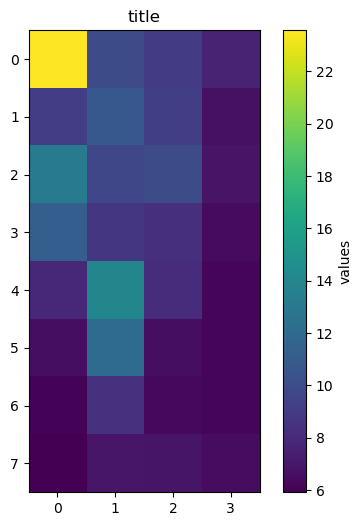

In [13]:
plt.figure(figsize=(6, 6))
plt.imshow(map_emg[0], cmap='viridis', vmin=np.nanmin(map_emg[0]), vmax=np.nanmax(map_emg[0]))
plt.colorbar(label="values")
plt.title("title")
plt.show()

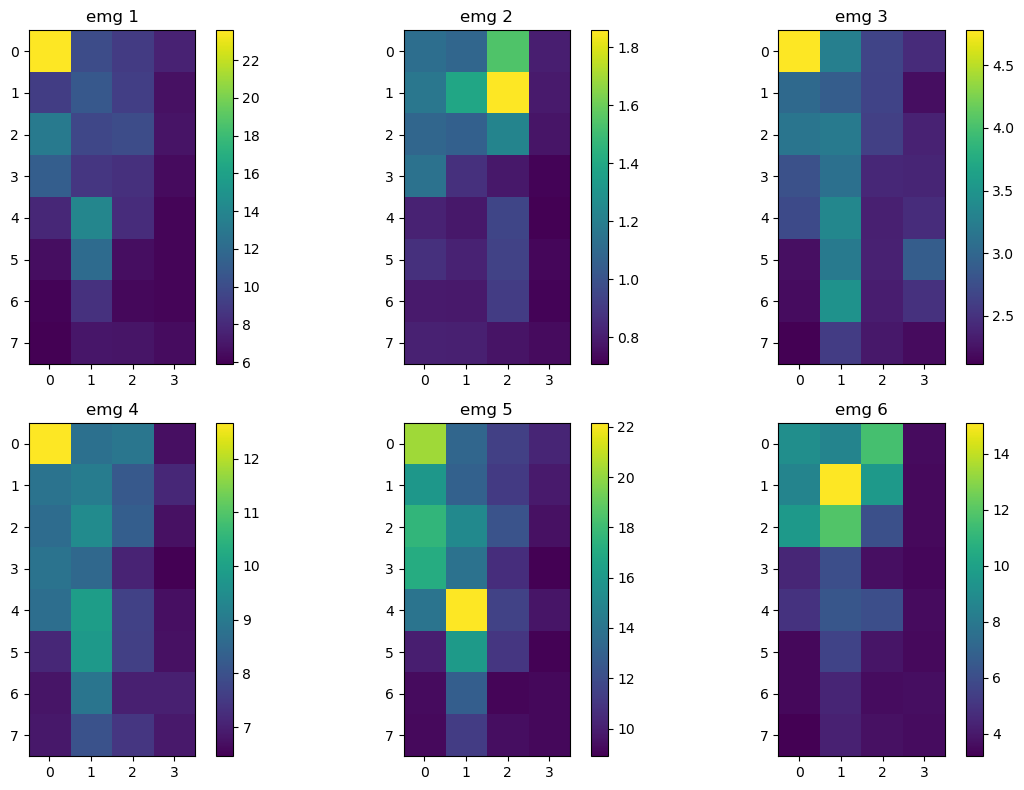

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8)) 

for idx, ax in enumerate(axes.flat):
    cax = ax.imshow(map_emg[idx], cmap='viridis', vmin=np.nanmin(map_emg[idx]), vmax=np.nanmax(map_emg[idx])) 
    ax.set_title(f'emg {idx + 1}')
    plt.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()

#### Map visualization 

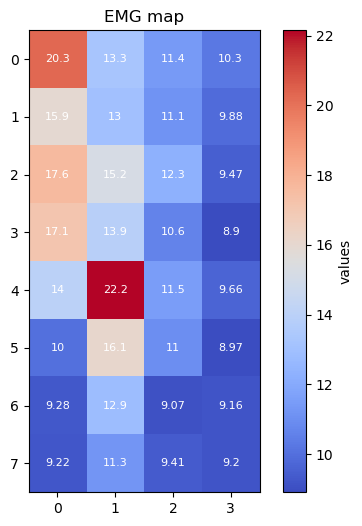

In [15]:
ds = DataSet('data/','rat','rat2_M1_190617.mat','rat2')
ds.load_matlab_data()

ch2xy = ds.set['ch2xy']
sorted_respMean = ds.set['sorted_respMean']
output = sorted_respMean[:,4]

map_emg = np.full((np.max(ch2xy[:,0]), np.max(ch2xy[:,1])), np.nan)
for i in range(ch2xy.shape[0]):
    map_emg[int(ch2xy[i,0]-1),int(ch2xy[i,1]-1)] = output[i]
# print(map_emg)

plt.figure(figsize=(6, 6))
plt.imshow(map_emg, cmap='coolwarm', vmin=np.nanmin(map_emg), vmax=np.nanmax(map_emg))
plt.colorbar(label="values")
plt.title("EMG map")

# Loop over each cell to display the value
for i in range(map_emg.shape[0]):
    for j in range(map_emg.shape[1]):
        plt.text(j, i, f"{map_emg[i, j]:.3g}", ha='center', va='center', color="white", fontsize=8)

plt.show()

In [16]:
# Normalize the coordinates to the range [0, 1]
input_space = (ch2xy - np.min(ch2xy, axis=0)) / (np.max(ch2xy, axis=0) - np.min(ch2xy, axis=0))

In [17]:
idx = 15
train_X = input_space[idx:idx+1]
train_Y = standardize_vector(output[idx:idx+1].reshape(-1,1))
print(output[idx:idx+1].reshape(-1,1))
print(train_X, train_Y)

[[22.155312]]
[[0.57142857 0.33333333]] [[1.]]


In [18]:
gp = FixedGP(input_space=input_space, train_X=train_X, train_Y=train_Y, kernel_type='Mat52', noise_std=0.3, output_std=3, lengthscale=[1.*1/7, 1.*1/3])
mean, std = gp.predict()

In [19]:
map_mean = np.full((np.max(ch2xy[:,0]), np.max(ch2xy[:,1])), np.nan)
for i in range(ch2xy.shape[0]):
    map_mean[int(ch2xy[i,0]-1),int(ch2xy[i,1]-1)] = mean[i]
# print(map_mean)

map_std = np.full((np.max(ch2xy[:,0]), np.max(ch2xy[:,1])), np.nan)
for i in range(ch2xy.shape[0]):
    map_std[int(ch2xy[i,0]-1),int(ch2xy[i,1]-1)] = std[i]
# print(map_std)

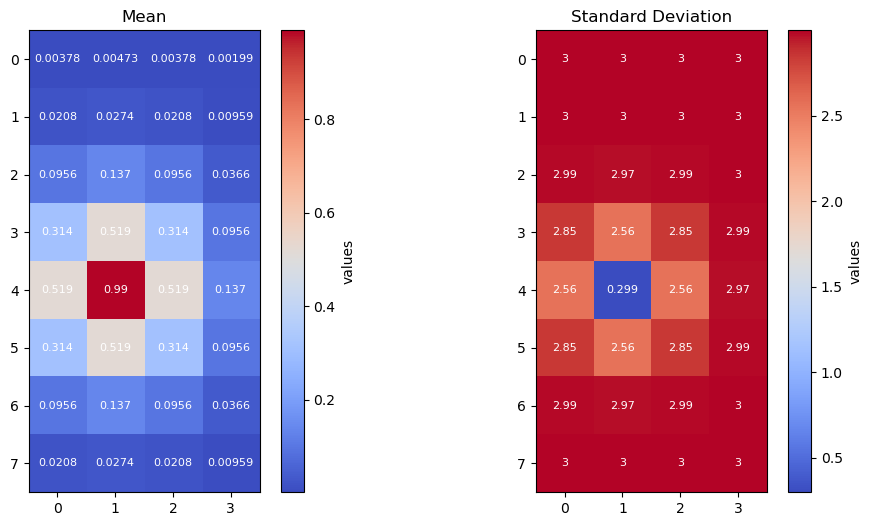

In [20]:
# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot map_mean on the left
im1 = axes[0].imshow(map_mean, cmap='coolwarm', vmin=np.nanmin(map_mean), vmax=np.nanmax(map_mean))
fig.colorbar(im1, ax=axes[0], label="values")
axes[0].set_title("Mean")

# Add values to each cell for map_mean
for i in range(map_mean.shape[0]):
    for j in range(map_mean.shape[1]):
        axes[0].text(j, i, f"{map_mean[i, j]:.3g}", ha='center', va='center', color="white", fontsize=8)

# Plot map_std on the right
im2 = axes[1].imshow(map_std, cmap='coolwarm', vmin=np.nanmin(map_std), vmax=np.nanmax(map_std))
fig.colorbar(im2, ax=axes[1], label="values")
axes[1].set_title("Standard Deviation")

# Add values to each cell for map_std
for i in range(map_std.shape[0]):
    for j in range(map_std.shape[1]):
        axes[1].text(j, i, f"{map_std[i, j]:.3g}", ha='center', va='center', color="white", fontsize=8)

plt.show()